In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import random
import math

# TASK 1 : EDA

In [2]:
creditcard = pd.read_csv('creditcard.csv')

In [3]:
creditcard.shape

(284807, 31)

In [4]:
creditcard.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
creditcard.Time.head(10)

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
5    2.0
6    4.0
7    7.0
8    7.0
9    9.0
Name: Time, dtype: float64

**OBSERVATION:**
*    No missing values.

Other features don't infer anything.Time feature also don't infer anything as seems like it contains sequential values of time like index.  So we will consider Amount Feature only for further analysis.

In [36]:
creditcard["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

**Observations:**
*    75% of transactions are of less than 78.

In [10]:
creditcard["Class"].unique()

array([0, 1], dtype=int64)

changing values of target column to "YES" nd "NO".  0=>Normal transactions and 1 => fraud transactons.
To have better intuition in plots I am changing Target columns with "yes" and "no".

In [21]:
creditcard.Class[creditcard.Class == 0]="No"
creditcard.Class[creditcard.Class == 1]="Yes"

C:\Users\JAYESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
creditcard["Class"].unique()

array(['No', 'Yes'], dtype=object)

In [41]:
print(creditcard["Class"].value_counts())
print(creditcard["Class"].value_counts(normalize=True))

No     284315
Yes       492
Name: Class, dtype: int64
No     0.998273
Yes    0.001727
Name: Class, dtype: float64


**OBSERVATIOJN:**
*    We have 99.82% normal transsactions and remaining are fraud transactions.
*    It is an imbalanced dataset.

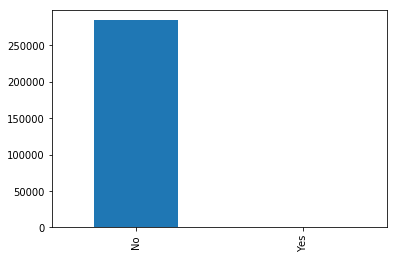

In [45]:
# Histogram plots of counts of target column class.
pd.value_counts(creditcard['Class'], sort = True).sort_index().plot(kind='bar')
plt.show()

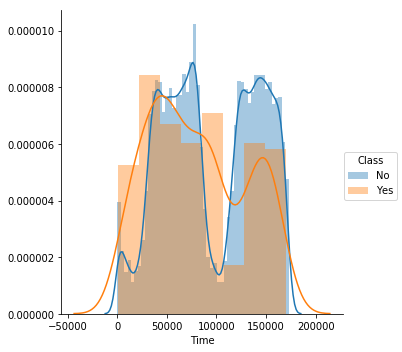

In [46]:
sns.FacetGrid(creditcard, hue="Class", size=5) \
   .map(sns.distplot, "Time") \
   .add_legend();

plt.show();

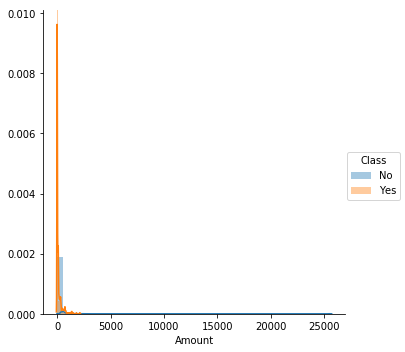

In [47]:
sns.FacetGrid(creditcard, hue="Class", size=5) \
   .map(sns.distplot, "Amount") \
   .add_legend();

plt.show();

**Time feature doesn't infer anything so will conider only Amount feature for further analysis.
Not able to conclude anything from above Histogra ad PDF.**

In [48]:
normal_trans = creditcard[creditcard.Class == "No"]
fraud_trans = creditcard[creditcard.Class == "Yes"]

In [61]:
print(normal_trans["Amount"].describe())


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [62]:
print(fraud_trans["Amount"].describe())


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


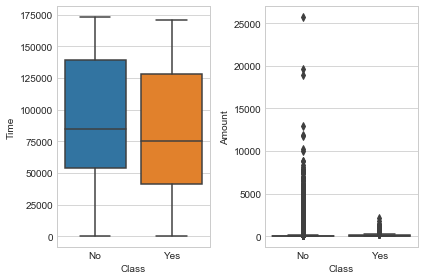

In [58]:
plt.subplot(1,2,1)
sns.boxplot(x='Class',y='Time', data=creditcard)
plt.subplot(1,2,2)
sns.boxplot(x='Class',y='Amount', data=creditcard)
plt.tight_layout()
plt.show()

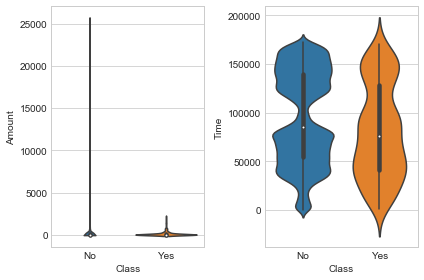

In [63]:
plt.subplot(1,2,1)
sns.violinplot(x="Class", y="Amount", data=creditcard, size=8)

plt.subplot(1,2,2)
sns.violinplot(x="Class", y="Time", data=creditcard, size=8)
plt.tight_layout()

plt.show()

**OBSERVATIONS:**
*    most of the frauds are of less amount.50% Frauds are of less than 10.

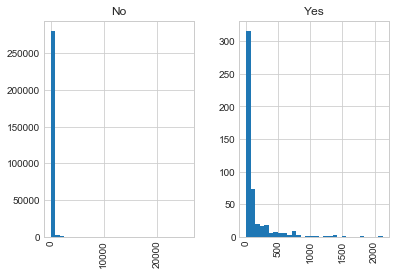

In [66]:

creditcard.hist(column="Amount",by="Class",bins=30)
plt.show()

# TASK 2: FIND SIMILARITY


In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
normal_sample = data.loc[data["Class"] == 0]
fraud_sample = data.loc[data["Class"] == 1]

In [4]:
###saving indices for normal and fruad records.
normal_idx = np.array(data.loc[data["Class"] == 0].index)
fraud_idx = np.array(data.loc[data["Class"] == 1].index)
#print(normal_idx)

In [5]:
#taking samples from normal and fraud transactions indvidually.
normal_choices = np.random.choice(normal_idx,100)
fraud_choices = np.random.choice(fraud_idx,50)

In [6]:
#concatenating both samples into one
final_choices = np.concatenate([normal_choices,fraud_choices])
len(final_choices)

150

In [7]:
#taking final 100 samples.
final_sample = np.random.choice(final_choices,100)
len(final_sample)

100

In [8]:
#checking counts of each class in sample
data.loc[final_sample]["Class"].value_counts()

0    63
1    37
Name: Class, dtype: int64

**SMILARITY ALGOrithm without using any library functons**

Function that calculates length of vactor.

In [9]:
def vec_len(x):
    '''Function that calculates length of vactor.'''
    #return round(sqrt(sum((a*a for a in np.nditer(x))))
    #sum = 0
    #for a in np.nditer(x):
        #print(math.sqrt(a*a)){
     #   sum += a*a
        #print("a:{}, sum:{}".format(a,sum))
    return math.sqrt(np.sum(x**2))

#vec_len(np.array(data.loc[final_sample[0]]))

Functon to calculate similarity between given two vectors.

In [10]:
def calc_similarity(n1,n2):
    numerator = np.array(np.dot(n1,n2))
    #print(numerator)
    denominator = (vec_len(n1)*vec_len(n2))
    #print(denominator)
    #print((numerator/denominator))
    if (numerator/denominator) > 1:
        temp = 1
    else:
        temp = (numerator/denominator)
    #print(temp)
    return math.acos(temp)

Print result.

In [11]:
for i in range(len(final_sample)):
    v1 = np.array(data.loc[final_sample[i]])
    similarity = []
    for j in range(len(data)):
        v2 = np.array(data.loc[j])

       # print(v1)
       # print(v2)
       # numerator = np.array(np.dot(v1,v2))
      # numerator = sum(a*b for a,b in zip(v1,v2))
       # print(numerator)
       # print(vec_len(v1))
       # denominator = (vec_len(v1)*vec_len(v2))
      #  print(denominator)
       # print(round((numerator/denominator),2))
        similar = calc_similarity(v1,v2)
        temp_array = [similar,j]
        #print(temp_array)
        similarity.append(temp_array)
    similarity.sort(key=lambda x: x[0])
    print("BEFORE REMOVING SIMILARITY WITH 0 VALUES.")
    print("***"*20)
    print("Given Transaction id:{},  class:{}".format(final_sample[i],data.Class[final_sample[i]]) )
    print("***"*20)
    print("Similar transactions")
    print("***"*20)
    for k in range(10):
        print("class = {} #similarity = {} #transaction id = {}".format(data.Class[similarity[k][1]],similarity[k][0],similarity[k][1]))
    print("----"*20)    
    print("//"*50)

BEFORE REMOVING SIMILARITY WITH 0 VALUES.
************************************************************
Given Transaction id:27362,  class:1
************************************************************
Similar transactions
************************************************************
class = 1 #similarity = 0.0 #transaction id = 27362
class = 0 #similarity = 4.926622265956916e-05 #transaction id = 33630
class = 0 #similarity = 5.6684990613476165e-05 #transaction id = 67151
class = 0 #similarity = 5.927303014622517e-05 #transaction id = 45338
class = 0 #similarity = 5.939233489844493e-05 #transaction id = 29073
class = 0 #similarity = 6.194796069839834e-05 #transaction id = 37684
class = 0 #similarity = 6.33632698508161e-05 #transaction id = 39031
class = 0 #similarity = 6.341105764133075e-05 #transaction id = 26439
class = 0 #similarity = 6.416636221789745e-05 #transaction id = 60810
class = 0 #similarity = 6.435613824588293e-05 #transaction id = 47434
-----------------------------------

KeyboardInterrupt: 

**SIMILARITY ALOGRITHM using SCIKIT-LEARN cosine complexity function.**

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

for l in range(len(final_sample)):
    v1 = np.array(data.loc[final_sample[l]])
    v1 = v1.reshape((1,v1.shape[0]))
   # print(v1.shape)
    similarity = []
    for m in range(len(data)):
        v2 = np.array(data.loc[m])
        v2 = v2.reshape((1,v2.shape[0]))
        similar = math.acos(1 if cosine_similarity(v1,v2) > 1 else cosine_similarity(v1,v2))
        temp_array = [similar,m]
        #print(temp_array)
        similarity.append(temp_array)
    similarity.sort(key=lambda x: x[0])
    print("Given Transaction id:{},  class:{}".format(final_sample[l],data.Class[final_sample[l]]) )
    print("***"*20)
    print("Similar transactions")
    print("***"*20)
    for m in range(10):
        print("class = {} #similarity = {} #transaction id = {}".format(data.Class[similarity[m][1]],similarity[m][0],similarity[m][1]))
    print("////"*20)
    print("----"*20)

Given Transaction id:27362,  class:1
************************************************************
Similar transactions
************************************************************
class = 1 #similarity = 0.0 #transaction id = 27362
class = 0 #similarity = 4.926622265956916e-05 #transaction id = 33630
class = 0 #similarity = 5.6684988654892364e-05 #transaction id = 67151
class = 0 #similarity = 5.927303389235722e-05 #transaction id = 45338
class = 0 #similarity = 5.939233676774845e-05 #transaction id = 29073
class = 0 #similarity = 6.194796428277134e-05 #transaction id = 37684
class = 0 #similarity = 6.336326634650497e-05 #transaction id = 39031
class = 0 #similarity = 6.341105939216578e-05 #transaction id = 26439
class = 0 #similarity = 6.416636048767151e-05 #transaction id = 60810
class = 0 #similarity = 6.435613824588293e-05 #transaction id = 47434
////////////////////////////////////////////////////////////////////////////////
--------------------------------------------------------

KeyboardInterrupt: 

** PS: YOU CAN SEE KEYBOARD INTERUP IN BOTH OUTPUT. IT WAS TAKING TIME TO RUN SO I TERMINATED EXECUTION.**